In [1]:
import gym
import gym_pdw
                                                    
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class SARSA_LAMBDA:
    
        # Epsilon-greedy action selection
    def select_action(self, epsilon, state, Q):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    # Q function update 
    def update(self, state, action, reward, next_state, next_action, E, Q, alpha):
        error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[action][state[0],state[1]]
        Q = Q + alpha*error*E

        return Q
    
    def sarsa_lambda(self,gamma, alpha, epsilon, episodes, lambda_val):

        # Set the goal variant
        goal_pos = env.set_goal('A')

        # Setting terminal action-state value 
        Terminal_state = goal_pos

        # Initializing Q function values to zero
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])


        steps = np.zeros([episodes])
        rewards = np.zeros([episodes])

        MAX_STEPS = 2000

        for episode in range(episodes):

            env.reset()

            curr_state = env.get_state()
            curr_action = env.random_action()

    #         print(curr_state ,"init====================")

            E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

            for i in range(MAX_STEPS):

                if steps[episode] != 0:
                    action = self.select_action(epsilon, curr_state, Q)

                next_state, reward = env.step(curr_state, curr_action)
                next_action = self.select_action(epsilon, next_state, Q)

                # Update eligibility traces
                E *= gamma*lambda_val
                E[curr_action][curr_state[0],curr_state[1]] += 1
#                 print(E,"=======================================")
                # Update Q values
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, E, Q, alpha)

    #             print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)


                steps[episode] +=1
                rewards[episode] += reward


                curr_state = next_state
                curr_action = next_action
    #             print(curr_state, "curr_state", env.start_positions)

                if curr_state == goal_pos:
                    print("Goal!!!!!!!!!!!!!!!!!!!!!!!", steps[episode])
                    break

        return rewards, steps, Q

In [3]:
def plot_sarsa_lambda(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
#     plt.show()


In [4]:
def plot_compare(rewards_all, steps_all, lambda_vals, episodes):
    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of c
    colors = ['b', 'r', 'g', 'm', 'y','k', 'c']

    # For each value of c, plot the average reward vs steps
    for i in range(25, len(rewards_all)):
        fig1.plot(range(episodes), rewards_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # For each c, plot the % times optimal arm selected vs steps
    for i in range(25, len(steps_all)):
        fig2.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # Labelling the  plot
    fig1.title.set_text('SARSA lambda comparition of Average reward vs episodes for various lambdas')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Labelling the plot
    fig2.title.set_text('SARSA lambda comparition of lambdas Average Steps vs episodes for various lambdas')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()



In [5]:
# To display the policy learn't
def plot_policy(goal_pos, Q):
    plt.rcParams['figure.figsize'] = [8,8]
    fig, ax = plt.subplots()

    ax.matshow(np.argmax(Q_all[0], axis=0))
    for i in range(12):
        for j in range(12):
            if [j,i] == goal_pos:
                    ax.text(i,j,'@', va='center', ha='center')
            else:
                c = int(np.argmax(Q_all[0], axis=0)[j,i])
                direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                ax.text(i, j, direcs[c], va='center', ha='center')

In [6]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
    
    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
#     lambda_vals = [0]
    
    avg_reward_all = []
    steps_all = []
    Q_all = []
    
    env = gym.make('gym_pdw:pdw-v0')
    
    srlbd = SARSA_LAMBDA()
    
    
    for i in range(len(lambda_vals)):
        avg_reward, steps, Q = srlbd.sarsa_lambda(gamma, alpha, epsilon, episodes, lambda_vals[i])
        
        Q_all.append(Q)
        
        avg_reward_all.append(avg_reward)
        steps_all.append(steps)
        
        plot_sarsa_lambda(avg_reward_all[i], steps_all[i], episodes)
        plot_policy([0,11],Q_all[i])
    plt.show
    
    plot_compare(avg_reward_all,steps_all, lambda_vals)
    

AttributeError: 'PdwEnv' object has no attribute 'get_state'

0 A


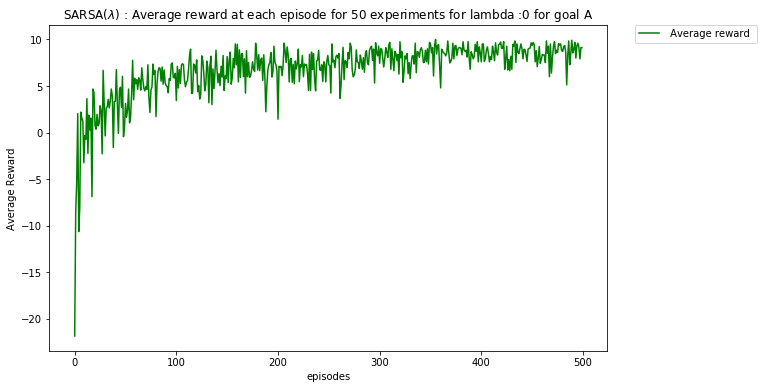

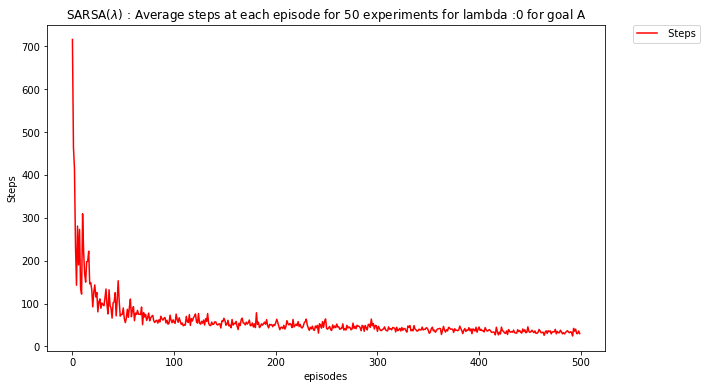

0 B


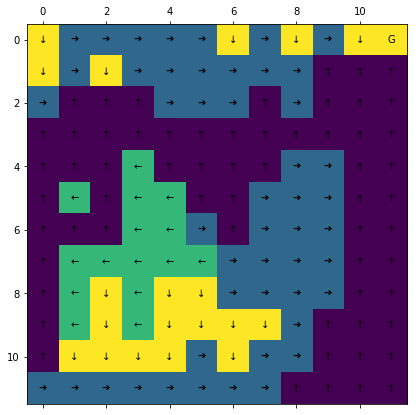

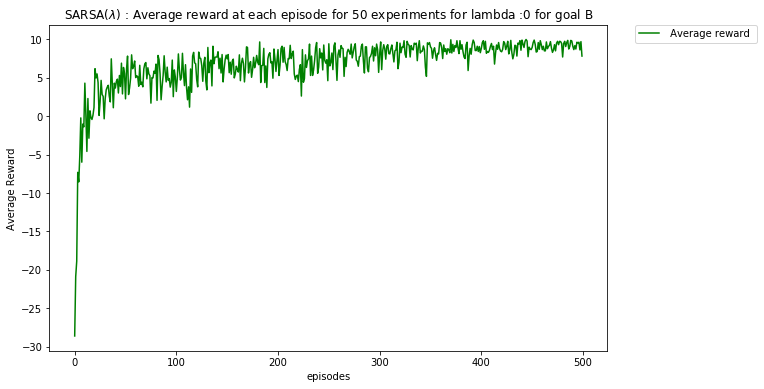

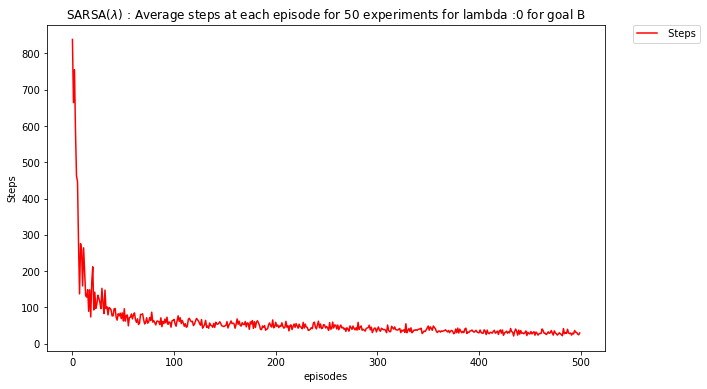

0 C


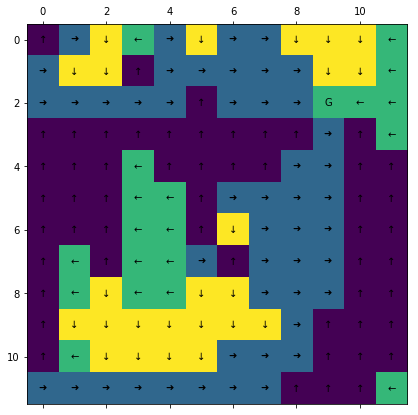

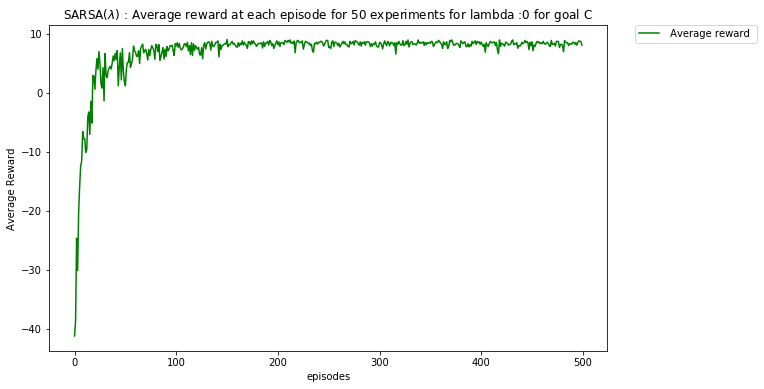

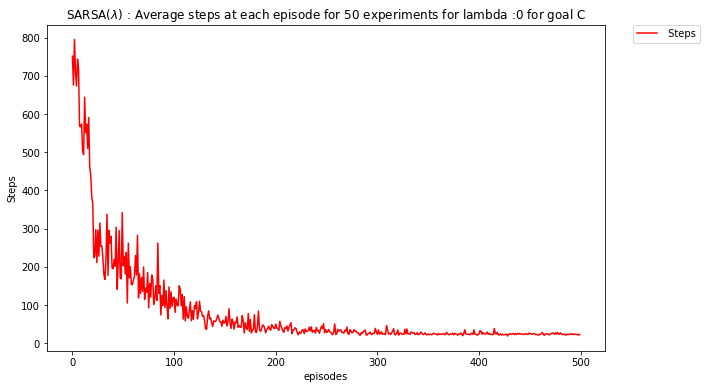

0.3 A


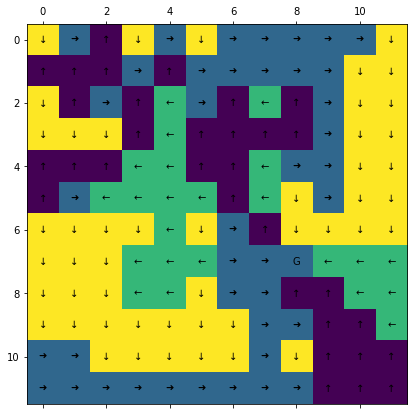

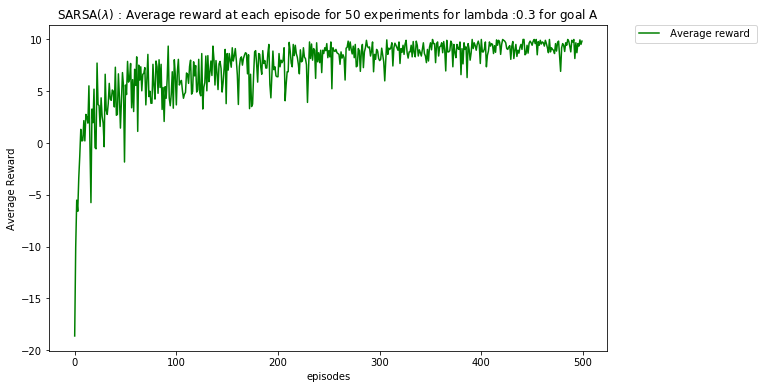

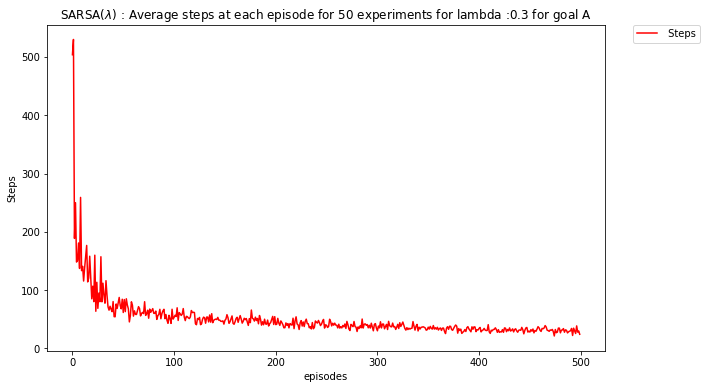

0.3 B


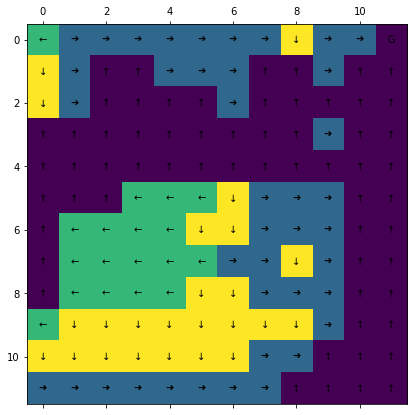

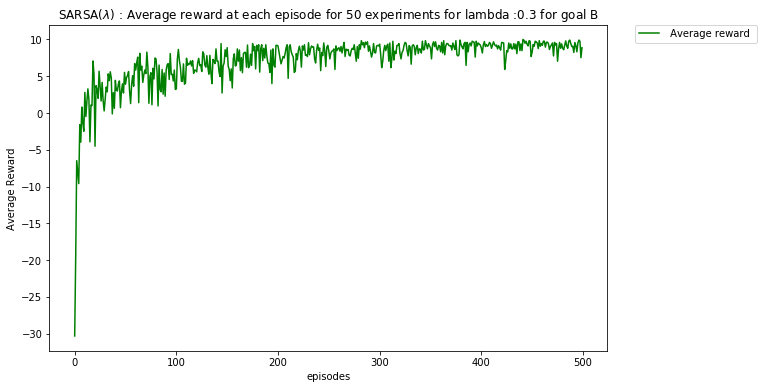

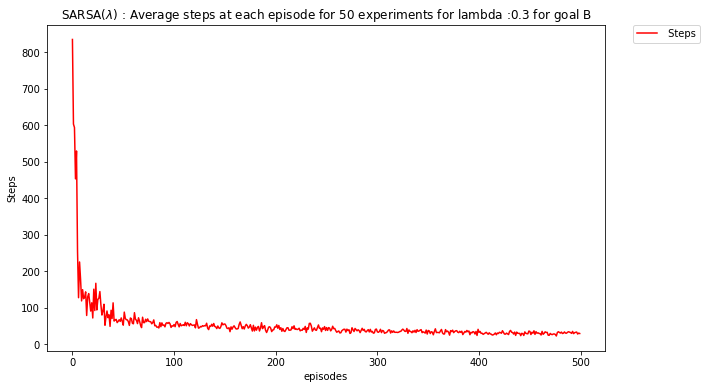

0.3 C


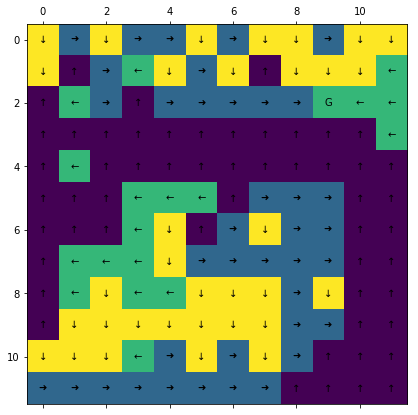

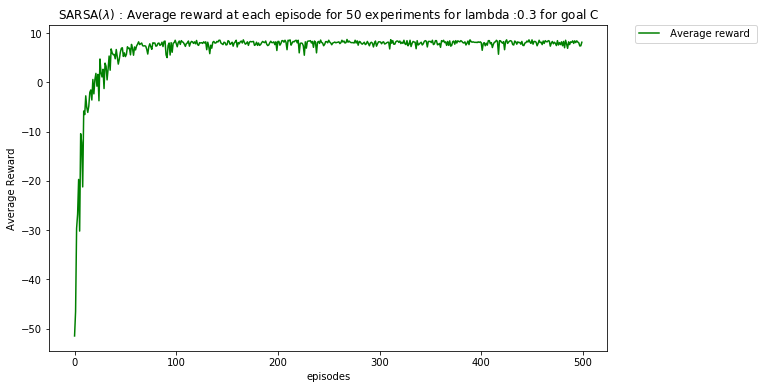

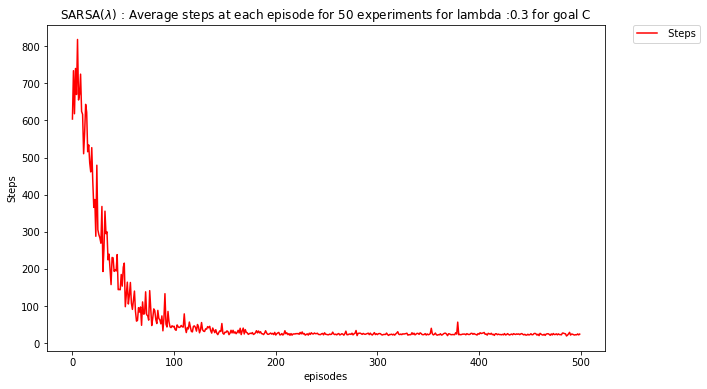

0.5 A


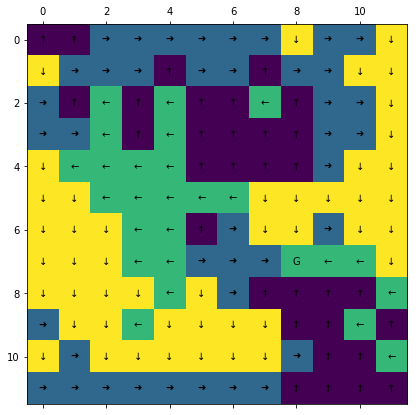

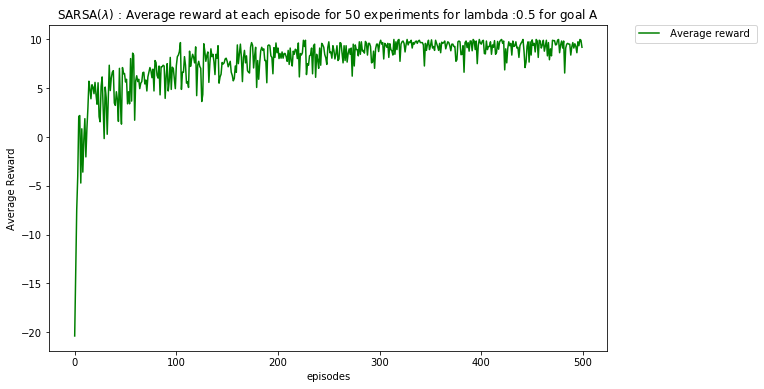

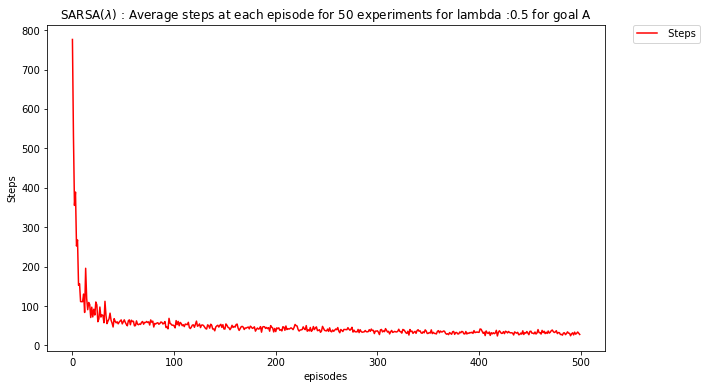

0.5 B


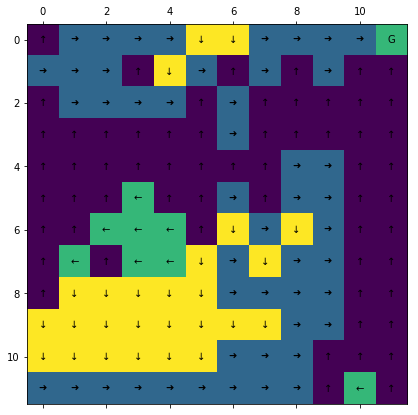

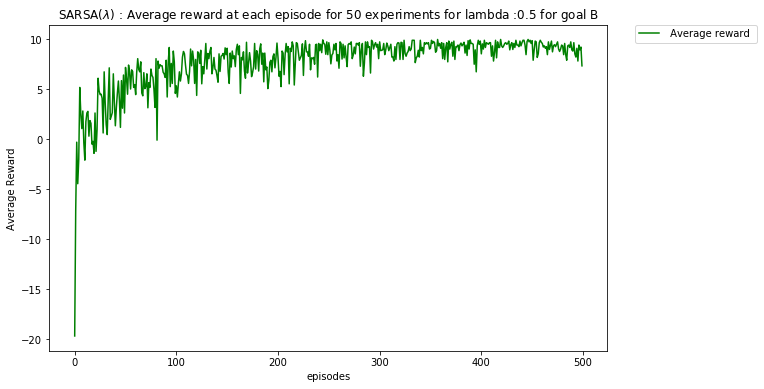

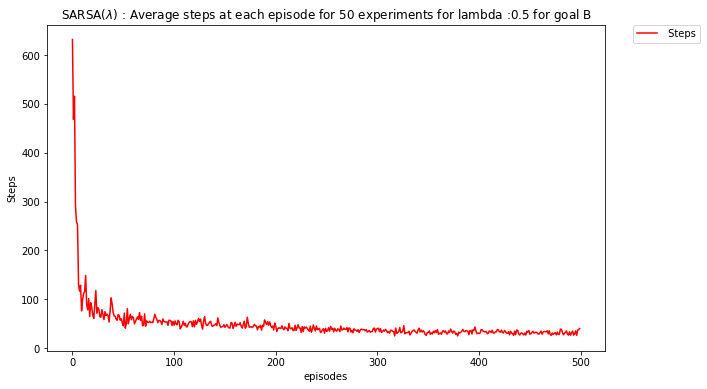

0.5 C


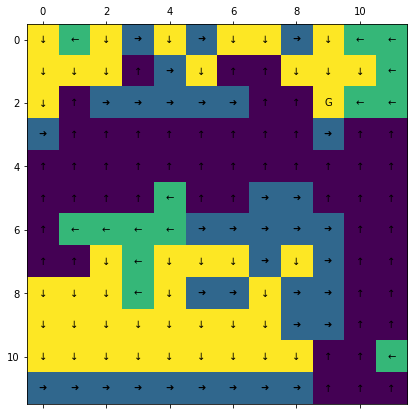

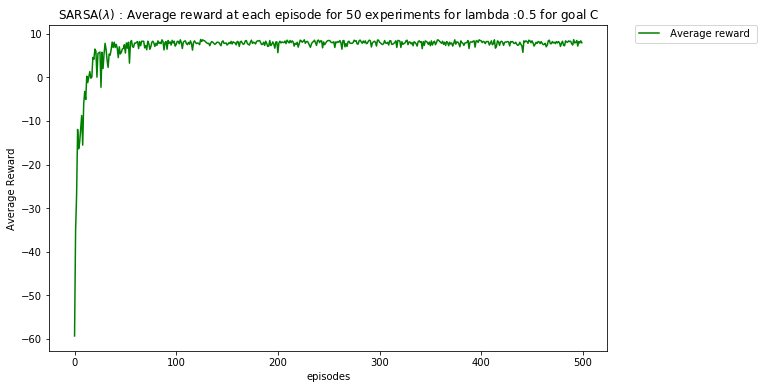

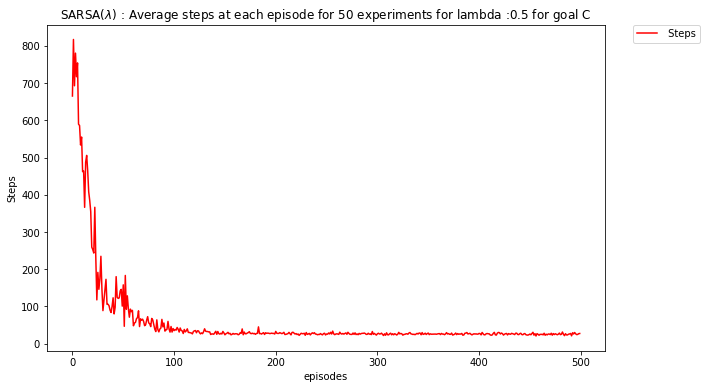

0.9 A


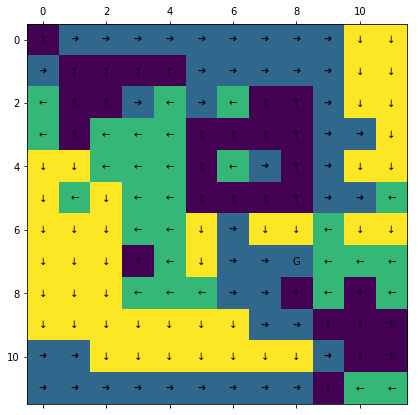

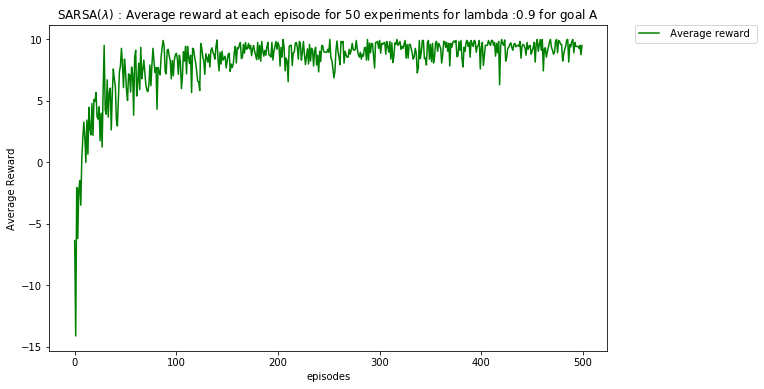

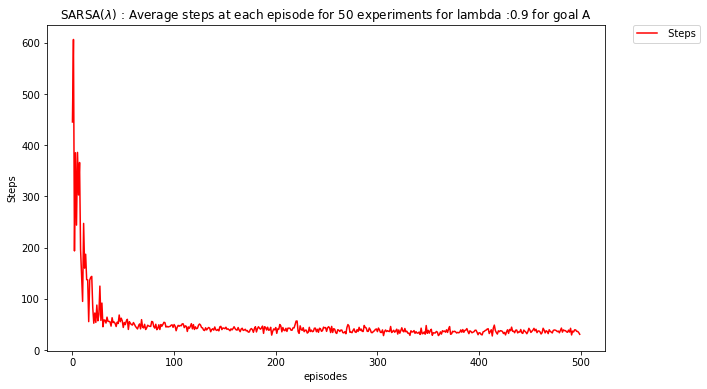

0.9 B


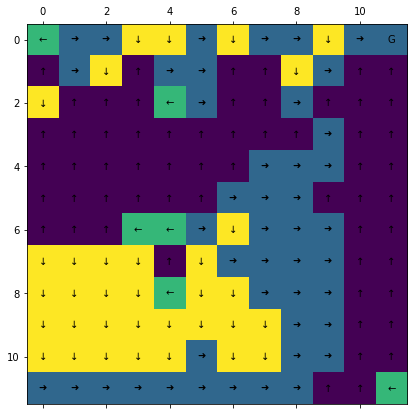

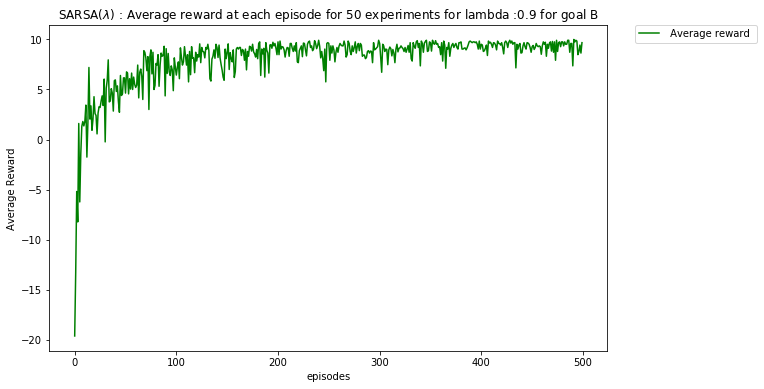

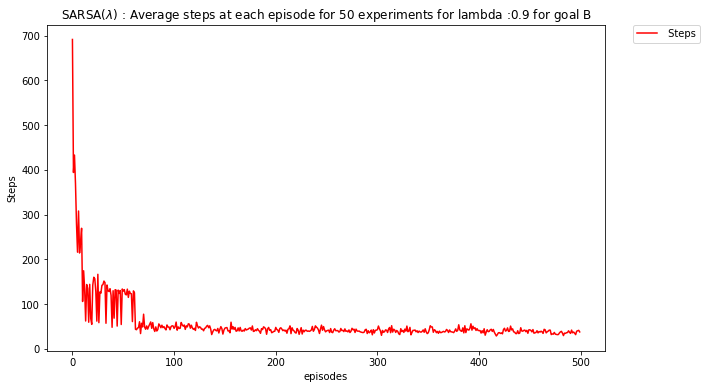

0.9 C


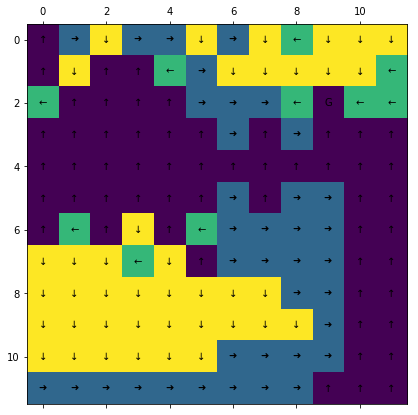

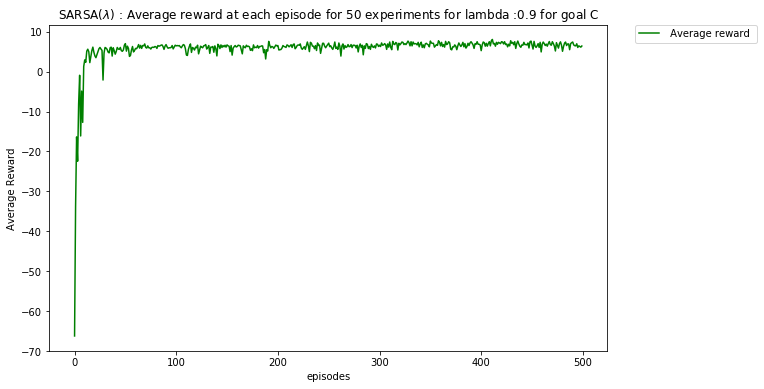

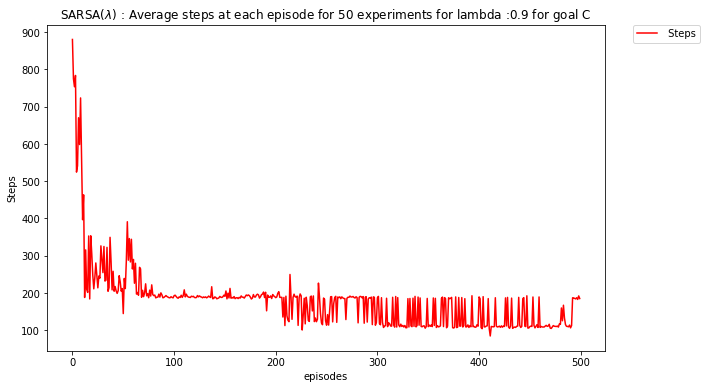

0.99 A


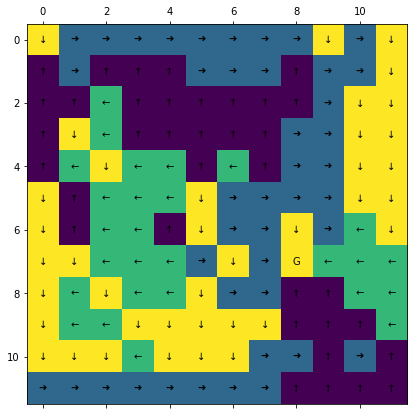

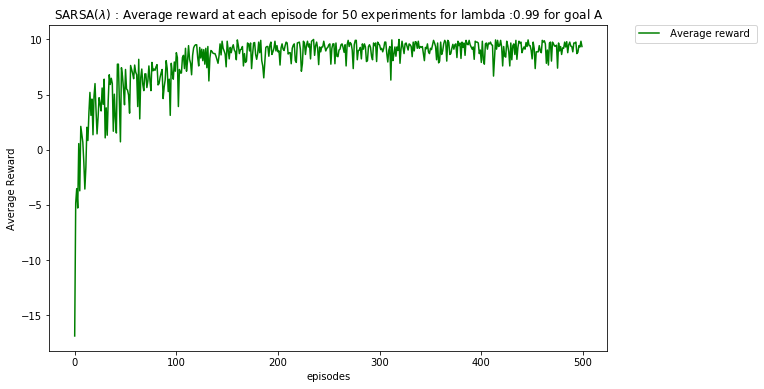

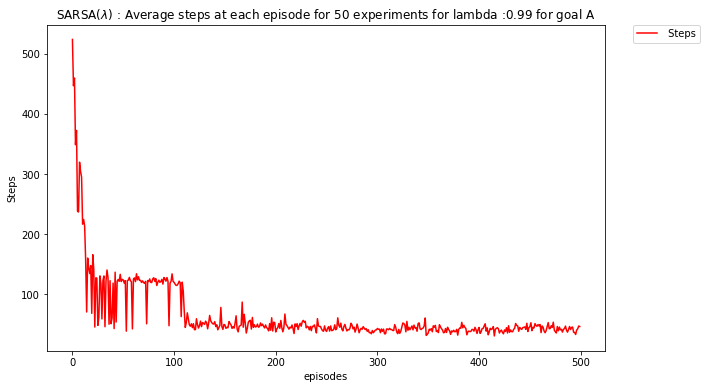

0.99 B


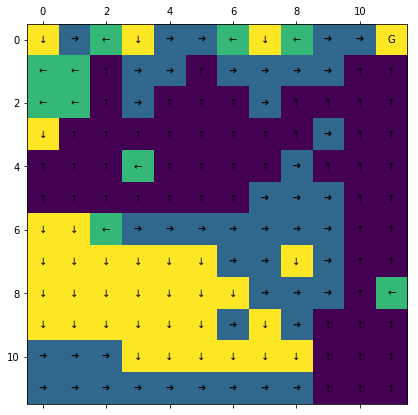

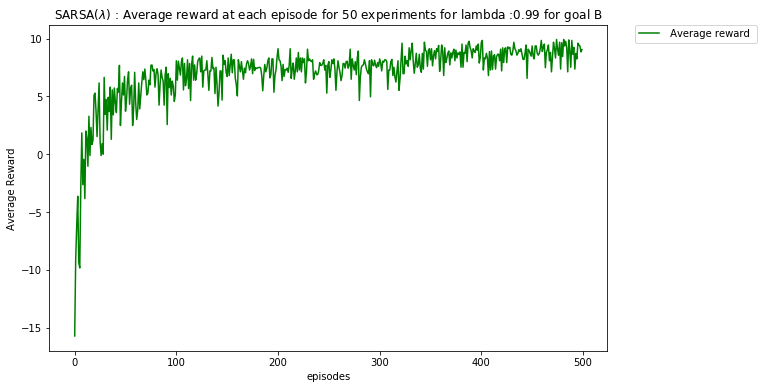

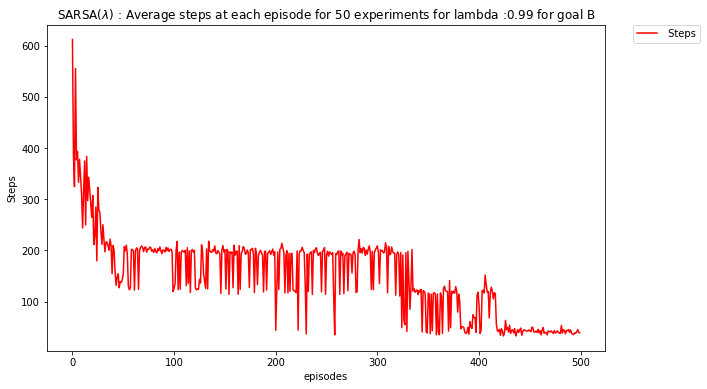

0.99 C


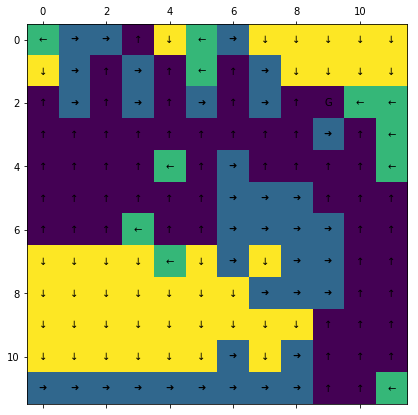

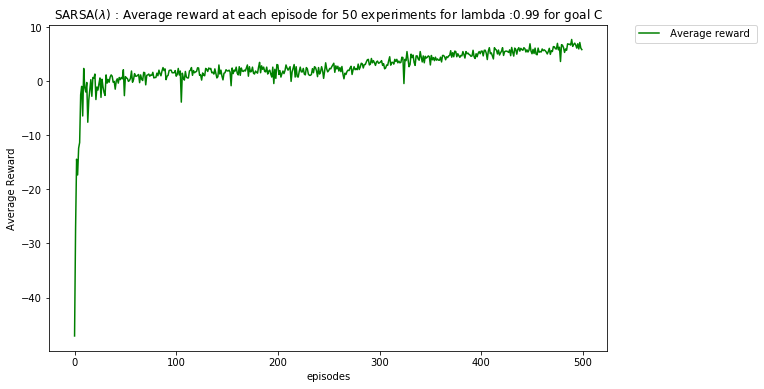

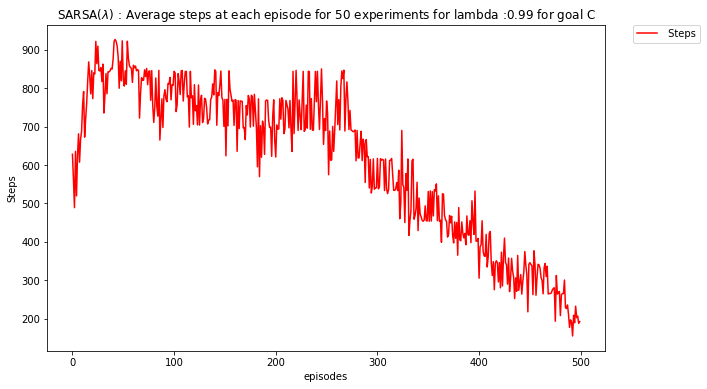

1.0 A


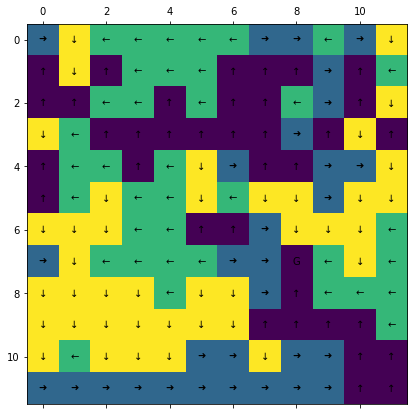

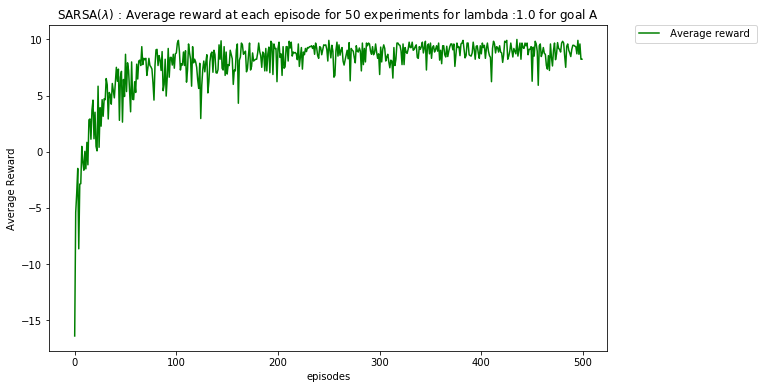

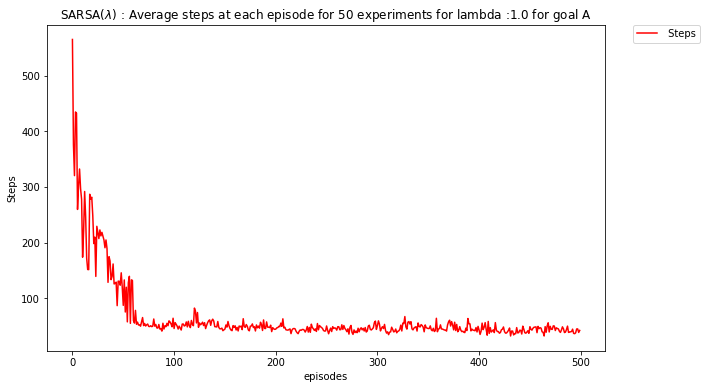

Process ForkPoolWorker-83:
Process ForkPoolWorker-130:
Process ForkPoolWorker-81:
Process ForkPoolWorker-73:
Process ForkPoolWorker-77:
Process ForkPoolWorker-78:
Process ForkPoolWorker-115:
Process ForkPoolWorker-82:
Process ForkPoolWorker-91:
Process ForkPoolWorker-137:
Process ForkPoolWorker-75:
Process ForkPoolWorker-102:
Process ForkPoolWorker-74:
Process ForkPoolWorker-111:
Process ForkPoolWorker-95:
Process ForkPoolWorker-129:
Process ForkPoolWorker-103:
Process ForkPoolWorker-96:
Process ForkPoolWorker-76:
Process ForkPoolWorker-99:
Process ForkPoolWorker-98:
Process ForkPoolWorker-100:
Process ForkPoolWorker-135:
Process ForkPoolWorker-84:
Process ForkPoolWorker-107:
Process ForkPoolWorker-80:
Process ForkPoolWorker-86:
Process ForkPoolWorker-109:
Process ForkPoolWorker-133:
Process ForkPoolWorker-105:
Process ForkPoolWorker-127:
Process ForkPoolWorker-119:
Process ForkPoolWorker-122:
Process ForkPoolWorker-89:
Process ForkPoolWorker-124:
Process ForkPoolWorker-108:
Process Fo

KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most rece

  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py

  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker

  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res

KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/us

  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInterrupt
  File "<ipython-input-9-a0aa256024fc>", line 93, in sarsa_lambda
    E *= gamma*lambda_val
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    retur

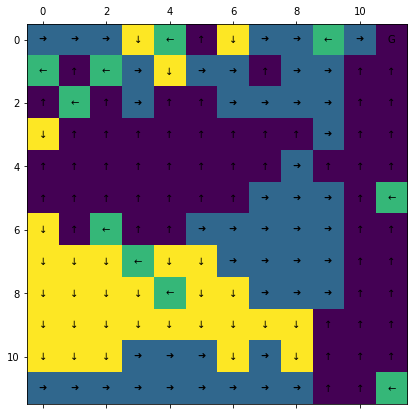

In [9]:
#########################################
############### Problem 2 ############### 
#########################################


import gym
import numpy as np
from matplotlib import pyplot as plt

import multiprocessing as mp

# The puddle world Environment 
import gym_pdw


class SARSA_lambda:
    
    def update(self, curr_state, curr_action, reward, next_state, next_action, E, Q, alpha, gamma):
        '''
        This function takes current state, current action, reward obtained next state, next action,
        current Q, parameters : alpha, gamma.
        Performs SARSA update to update action value function Q  
        '''
        error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[curr_action][curr_state[0],curr_state[1]]
        Q = Q + alpha*error*E
        
        return Q
    
    
    def select_action(self, epsilon, state, Q, env):
        '''
        This function is to select action according to Epsilon-greedy wrt Q value function
        '''
        # The exploration part
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        # The expoition part
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    
    def sarsa_lambda(self, gamma, alpha, epsilon, episodes, lambda_val, env, goal):
        '''
        This function performs :    initialization of environment,
                                    sets goal position,
                                    run episodes, 
                                    perform actions,
                                    changes state,
                                    make Q function updates
        Returns :   rewards - An array of total reward in each episode
                    steps   - An array of total steps taken in each episode
                    Q       - The Final Q (action value) function

        '''

        # Set the goal position
        goal_pos = env.set_goal(goal)

        # Initialize the action value function to the size of 
        # [number of actions , number grid cells in x direction , number grid cells in y direction]
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])


        # Initialize the steps, rewards array to size of number of episodes
        steps = np.zeros([episodes])
        rewards = np.zeros([episodes])

        MAX_STEPS = 1000
        for episode in range(episodes):
            # For each episode

            # Reset the environment, which return the start position
            curr_state = env.reset()
            
            # Select action based on current state and Q function
            curr_action = self.select_action(epsilon, curr_state, Q, env)

            E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])


            # Run untill we reach the goal 
            for i in range(MAX_STEPS):


                # Get the next state and reward based on the current state and action perfomed
                next_state, reward = env.step(curr_state, curr_action)

                # Perform next action based on the above next state, Q function using epsilon greedy method
                next_action = self.select_action(epsilon, next_state, Q, env)

                # Update eligibility traces
                E *= gamma*lambda_val
                E[curr_action][curr_state[0],curr_state[1]] += 1

                # print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)
                
                # Update the Q function based on SARSA update
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, E, Q, alpha, gamma)
                                
                # Set the next state and next action as current state and current action
                curr_state = next_state
                curr_action = next_action
                
                # Increase the steps made in the episode
                steps[episode]+=1
                # Increase the reward obtained in the episode 
                rewards[episode] += reward

                # If we reach the goal, we break the loop i.e, episode ends
                if curr_state == goal_pos:
                    # print("Steps =======================", steps[episode])
                    # print("reward=======================", avg_reward[episode])
                    break

        # print("-----------One exp done-----------")
        return rewards, steps, Q

        
    def plot_sarsa(self, avg_reward, steps, episodes, lambda_, goal):
        '''
        Gets the data for all curves and plots them in one graph
        '''
        # Figure instances will be returned.
        fig1=plt.figure(figsize=(10,6)).add_subplot(111)
        fig2=plt.figure(figsize=(10,6)).add_subplot(111)

        # colors for different values of epsilon
        colors = ['g', 'r', 'k', 'b', 'y','m', 'c']
        fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
        fig2.plot(range(episodes), steps, colors[1], label = " Steps")
        
        # Labelling the plot
        fig1.title.set_text('SARSA'+ '($\lambda$)'+ ' : Average reward at each episode for 50 experiments for lambda :'+ str(lambda_) + ' for goal '+goal)
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('episodes')
        fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        # Labelling the plot
        fig2.title.set_text('SARSA' + '($\lambda$)'+' : Average steps at each episode for 50 experiments for lambda :'+ str(lambda_) + ' for goal '+goal)
        fig2.set_ylabel('Steps')
        fig2.set_xlabel('episodes')
        fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        # Display the plot
        plt.show()

    
    def plot_compare(self, rewards_all, steps_all, lambda_vals, episodes):
    
        # Figure instances will be returned.
        fig1=plt.figure(figsize=(10,6)).add_subplot(111)
        fig2=plt.figure(figsize=(10,6)).add_subplot(111)

        # colors for different values of c
        colors = ['b', 'r', 'g', 'm', 'y','k', 'c']

        # For each value of c, plot the average reward vs steps
        for i in range(len(rewards_all)):
            fig1.plot(range(25,episodes), rewards_all[i][25:], colors[i], label = "lambda = " + str(lambda_vals[i]) )

        # For each c, plot the % times optimal arm selected vs steps
        for i in range(len(steps_all)):
            fig2.plot(range(25,episodes), steps_all[i][25:], colors[i], label = "lambda = " + str(lambda_vals[i]) )

        # Labelling the  plot
        fig1.title.set_text('SARSA lambda comparition of Average reward vs episodes for various lambdas')
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('episodes')
        fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        # Labelling the plot
        fig2.title.set_text('SARSA lambda comparition of lambdas Average Steps vs episodes for various lambdas')
        fig2.set_ylabel('Steps')
        fig2.set_xlabel('episodes')
        fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        # Display the plot
        plt.show()


    # To display the obtained policy
    def plot_policy(self, goal_pos, policy,):
        plt.rcParams['figure.figsize'] = [7,7]
        fig, ax = plt.subplots()
        # Plot the values of a 2D matrix or array as color-coded image.
        ax.matshow(policy)
        for i in range(12):
            for j in range(12):
                if [j,i] == goal_pos:
                    # Show G at the goal of grid  
                    ax.text(i,j,'G', va='center', ha='center')
                else:
                    # Show the direction at each grid cell according to policy
                    c = int(policy[j,i])
                    direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                    ax.text(i, j, direcs[c], va='center', ha='center')



if __name__ == '__main__':
    '''
    Defining the parameters
    '''
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 500

    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
#     lambda_vals = [0]

    # The goal positions in the environment
    goal_positions = {'A':[0,11],'B':[2,9],'C':[7,8]}
    # A dict to reference goal in a loop
    temp = {0:'A',1:'B',2:'C'}

    com_rew = []
    com_stp = []

    for p in range (len(lambda_vals)):
        for q in range(len(goal_positions)):
            
            goal = temp[q]
            lambda_ = lambda_vals[p]
            
            # Instance of class SARSA
            sr = SARSA_lambda()

            # Number of process to run in parallel here 4  
            pool = mp.Pool(processes = 4)
            # Gets all the outputs into 'data' after all processes are finished, we are running total of 50 experiments
            data = [pool.apply(sr.sarsa_lambda,args=(gamma, alpha, epsilon, episodes, lambda_, gym.make('gym_pdw:pdw-v0'),goal)) for x in range(50)] 

            # Store the average reward at each episode
            avg = np.zeros([episodes])
            # Store the number of steps in each episode
            stp = np.zeros([episodes])


            # To get the average rewards at each episode and average number of steps in each episode
            for i in range(episodes):
                for j in range(len(data)):
                    avg[i] += data[j][0][i]/len(data)
                    stp[i] += data[j][1][i]/len(data)

            # To store final policy obtained for 50 experiments 
            policy = np.zeros([12,12])

            # Used to select most chosen action over all experiments 
            val = {0:0, 1:0, 2:0, 3:0}

            # Selects the most times chosen action over all experiments according to policy in each state
            for i in range(12):
                for j in range(12):
                    for k in range(len(data)):
                        val[np.argmax(data[k][2], axis=0)[i,j]]+=1
                    # Get the most chosen action at the current state
                    max_ = max(val, key=val.get)
                    val = {0:0, 1:0, 2:0, 3:0}
                    policy[i,j] = max_

            com_rew.append(avg)
            com_stp.append(stp)
            

            print(lambda_, goal)

            # Plot for all 
            sr.plot_sarsa(avg, stp, episodes, lambda_, goal)
            sr.plot_policy(goal_positions[temp[q]], policy)
        
#     x = np.arange(0,len(com_rew),3, dtype = int)
#     print(x)
#     rew_val = []
#     stp_val = []
#     print(len(com_rew))
#     print(len(com_rew[0]))
#     sr = SARSA_lambda()
    
#     for i in range(len(x)):
# #         print(com_rew[x[i]])
# #         print(com_stp[x[i]])
        
#         rew_val.append(com_rew[x[i]])
#         stp_val.append(com_stp[x[i]])
#     sr.plot_compare(rew_val, stp_val, lambda_vals, episodes)